In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from load_data import load_data_from_postgres, check_missing_values

In [4]:
query = "select * from cleaned_xdr_data;"

df = load_data_from_postgres(query)
df

c:\Users\Hp\Desktop\Kifiya\Week 2\TellCo’s Growth Analysis\scripts\load_data.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:00,770.0,2019-04-25 14:35:00,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:00,235.0,2019-04-25 08:15:00,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:00,1.0,2019-04-25 11:58:00,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:00,486.0,2019-04-25 07:36:00,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:00,565.0,2019-04-25 10:40:00,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,2019-04-29 07:28:00,451.0,2019-04-30 06:02:00,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,2019-04-29 07:28:00,483.0,2019-04-30 10:41:00,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,2019-04-29 07:28:00,283.0,2019-04-30 10:46:00,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,2019-04-29 07:28:00,696.0,2019-04-30 10:40:00,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [4]:
check_missing_values(df)
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


#### Top_10 handsets used by customers 

In [5]:
top_10_handsets = df['Handset Type'].value_counts().head(11)
print("Top 10 Handsets")
print(top_10_handsets)

Top 10 Handsets
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: count, dtype: int64


#### Identify the top 3 handset manufacturers

In [6]:
top_3_handset_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Manufacturers")
print(top_3_handset_manufacturers)

Top 3 Manufacturers
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


#### Identify the top 5 handsets per top 3 handset manufacturer

In [7]:
top_5_handsets_per_manufacturer  = {}
for manufacturers in top_3_handset_manufacturers.index:
    top_5_handsets = df[df['Handset Manufacturer'] == manufacturers]['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturers] = top_5_handsets

print("\nTop 5 Handsets per Top 3 Handset Manufacturer:")
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(handsets)


Top 5 Handsets per Top 3 Handset Manufacturer:

Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


#### Interpretation 

### Task-1 

In [8]:
# Aggregate per user
aggregated_data = df.groupby('IMSI').agg(
    number_of_xDR_sessions=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_DL_data=('HTTP DL (Bytes)', 'sum'),
    total_UL_data=('HTTP UL (Bytes)', 'sum'),
    total_social_media_DL=('Social Media DL (Bytes)', 'sum'),
    total_social_media_UL=('Social Media UL (Bytes)', 'sum'),
    total_youtube_DL=('Youtube DL (Bytes)', 'sum'),
    total_youtube_UL=('Youtube UL (Bytes)', 'sum'),
    total_netflix_DL=('Netflix DL (Bytes)', 'sum'),
    total_netflix_UL=('Netflix UL (Bytes)', 'sum'),
    total_google_DL=('Google DL (Bytes)', 'sum'),
    total_google_UL=('Google UL (Bytes)', 'sum'),
    total_email_DL=('Email DL (Bytes)', 'sum'),
    total_email_UL=('Email UL (Bytes)', 'sum'),
    total_gaming_DL=('Gaming DL (Bytes)', 'sum'),
    total_gaming_UL=('Gaming UL (Bytes)', 'sum'),
    total_other_DL=('Other DL (Bytes)', 'sum'),
    total_other_UL=('Other UL (Bytes)', 'sum')
).reset_index()

# Calculate total data volume for each application
aggregated_data['total_social_media_data'] = aggregated_data['total_social_media_DL'] + aggregated_data['total_social_media_UL']
aggregated_data['total_youtube_data'] = aggregated_data['total_youtube_DL'] + aggregated_data['total_youtube_UL']
aggregated_data['total_netflix_data'] = aggregated_data['total_netflix_DL'] + aggregated_data['total_netflix_UL']
aggregated_data['total_google_data'] = aggregated_data['total_google_DL'] + aggregated_data['total_google_UL']
aggregated_data['total_email_data'] = aggregated_data['total_email_DL'] + aggregated_data['total_email_UL']
aggregated_data['total_gaming_data'] = aggregated_data['total_gaming_DL'] + aggregated_data['total_gaming_UL']
aggregated_data['total_other_data'] = aggregated_data['total_other_DL'] + aggregated_data['total_other_UL']

# Save the aggregated data to a new CSV file
aggregated_data.to_csv('aggregated_user_behavior.csv', index=False)

print("Aggregated data saved to 'aggregated_user_behavior.csv'")

Aggregated data saved to 'aggregated_user_behavior.csv'


In [9]:
data = pd.read_csv('aggregated_user_behavior.csv')
data

,IMSI,number_of_xDR_sessions,total_session_duration,total_DL_data,total_UL_data,total_social_media_DL,total_social_media_UL,total_youtube_DL,total_youtube_UL,total_netflix_DL,...,total_gaming_UL,total_other_DL,total_other_UL,total_social_media_data,total_youtube_data,total_netflix_data,total_google_data,total_email_data,total_gaming_data,total_other_data
0,-1.000000e+00,570,37507440.0,3.042445e+10,8.909363e+08,1.033955e+09,1.928896e+07,6.851450e+09,6.232417e+09,6.732883e+09,...,4.565405e+09,2.341575e+11,4.889854e+09,1.053244e+09,1.308387e+10,1.312887e+10,4.385040e+09,1.300748e+09,2.441764e+11,2.390474e+11
1,2.040471e+14,1,869844.0,1.141636e+08,3.230663e+06,1.500145e+06,4.594300e+04,1.898032e+07,2.196039e+07,2.162134e+07,...,1.497798e+07,3.891597e+08,1.220074e+07,1.546088e+06,4.094071e+07,2.884623e+07,9.218647e+06,3.330974e+06,4.307026e+07,4.013605e+08
2,2.040808e+14,1,877385.0,1.141636e+08,3.230663e+06,6.685960e+05,4.662800e+04,9.839889e+06,2.120016e+06,1.034091e+07,...,1.348513e+07,4.676781e+08,2.848373e+06,7.152240e+05,1.195990e+07,2.659230e+07,1.043866e+07,1.520771e+06,1.780487e+08,4.705265e+08
3,2.082001e+14,1,86019.0,4.020000e+02,4.530000e+02,3.073697e+06,4.908400e+04,5.556563e+06,1.432588e+07,1.530536e+07,...,5.363582e+06,5.000445e+08,1.592918e+07,3.122781e+06,1.988244e+07,3.183056e+07,1.624662e+06,3.657501e+06,9.124516e+06,5.159737e+08
4,2.082001e+14,1,86254.0,7.266310e+05,1.686950e+05,2.542767e+06,3.433700e+04,2.241471e+07,3.242918e+06,1.006564e+07,...,1.593940e+05,3.009029e+08,8.707888e+06,2.577104e+06,2.565763e+07,2.778585e+07,1.381148e+07,3.855734e+06,3.441059e+08,3.096107e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107261,2.082099e+14,1,127367.0,1.141636e+08,3.230663e+06,1.209387e+06,4.721600e+04,8.661662e+06,2.959812e+06,5.726631e+06,...,1.423597e+07,5.808342e+08,7.560085e+06,1.256603e+06,1.162147e+07,1.076752e+07,1.204761e+07,9.563120e+05,6.784940e+08,5.883943e+08
107262,2.082099e+14,1,168543.0,1.141636e+08,3.230663e+06,3.462783e+06,2.972000e+03,2.325196e+07,1.160550e+07,1.419327e+07,...,3.311290e+06,7.437719e+08,8.852044e+06,3.465755e+06,3.485746e+07,3.073525e+07,4.287813e+06,2.284566e+06,4.113827e+08,7.526239e+08
107263,2.082099e+14,1,86399.0,5.951000e+03,4.564000e+03,2.601607e+06,8.059000e+03,2.219689e+07,6.993803e+06,1.505172e+07,...,7.089918e+06,4.481531e+08,8.582273e+06,2.609666e+06,2.919070e+07,1.960574e+07,4.427934e+06,1.717645e+06,2.720466e+08,4.567354e+08
107264,2.082522e+14,1,56613.0,1.141636e+08,3.230663e+06,6.215860e+05,4.549500e+04,1.277613e+07,1.213337e+07,9.816072e+06,...,1.538576e+07,5.791097e+08,1.537084e+07,6.670810e+05,2.490950e+07,1.091421e+07,2.227505e+06,3.054624e+06,7.885695e+08,5.944805e+08


In [10]:
data.columns

Index(['IMSI', 'number_of_xDR_sessions', 'total_session_duration',
       'total_DL_data', 'total_UL_data', 'total_social_media_DL',
       'total_social_media_UL', 'total_youtube_DL', 'total_youtube_UL',
       'total_netflix_DL', 'total_netflix_UL', 'total_google_DL',
       'total_google_UL', 'total_email_DL', 'total_email_UL',
       'total_gaming_DL', 'total_gaming_UL', 'total_other_DL',
       'total_other_UL', 'total_social_media_data', 'total_youtube_data',
       'total_netflix_data', 'total_google_data', 'total_email_data',
       'total_gaming_data', 'total_other_data'],
      dtype='object')

In [11]:
data.isnull().sum()

IMSI                       0
number_of_xDR_sessions     0
total_session_duration     0
total_DL_data              0
total_UL_data              0
total_social_media_DL      0
total_social_media_UL      0
total_youtube_DL           0
total_youtube_UL           0
total_netflix_DL           0
total_netflix_UL           0
total_google_DL            0
total_google_UL            0
total_email_DL             0
total_email_UL             0
total_gaming_DL            0
total_gaming_UL            0
total_other_DL             0
total_other_UL             0
total_social_media_data    0
total_youtube_data         0
total_netflix_data         0
total_google_data          0
total_email_data           0
total_gaming_data          0
total_other_data           0
dtype: int64

In [12]:
z_scores = np.abs((data - data.mean()) / data.std())

outliers = z_scores > 3 
outlier_counts = outliers.sum()
print(outlier_counts)

IMSI                         4
number_of_xDR_sessions      81
total_session_duration     808
total_DL_data              490
total_UL_data              558
total_social_media_DL      135
total_social_media_UL      132
total_youtube_DL           144
total_youtube_UL           136
total_netflix_DL           139
total_netflix_UL           153
total_google_DL            162
total_google_UL            136
total_email_DL             158
total_email_UL             160
total_gaming_DL            147
total_gaming_UL            172
total_other_DL             163
total_other_UL             124
total_social_media_data    132
total_youtube_data         124
total_netflix_data         130
total_google_data          139
total_email_data           143
total_gaming_data          143
total_other_data           159
dtype: int64


Given the nature of my dataset and the significant number of outliers(compared to overall rows it's small though), I recommend capping the outliers. This approach allows me to retain all data points while limiting the influence of extreme values, which is particularly useful in network traffic data where outliers might represent significant user behaviors.

In [13]:
# Cap outliers at the 95th percentile
cap_value = data.quantile(0.95)
capped_data = data.clip(upper=cap_value, axis=1)

# Save the capped data
capped_data.to_csv('capped_data.csv', index=False)
print("Capped data saved to 'capped_data.csv'")

Capped data saved to 'capped_data.csv'


#### Load cleaned data 

In [14]:
data1 = pd.read_csv('capped_data.csv')
data1

,IMSI,number_of_xDR_sessions,total_session_duration,total_DL_data,total_UL_data,total_social_media_DL,total_social_media_UL,total_youtube_DL,total_youtube_UL,total_netflix_DL,...,total_gaming_UL,total_other_DL,total_other_UL,total_social_media_data,total_youtube_data,total_netflix_data,total_google_data,total_email_data,total_gaming_data,total_other_data
0,-1.000000e+00,3,369585.25,3.424908e+08,9.726809e+06,5998086.75,110628.5,38980494.75,36811202.0,38913941.5,...,27763961.25,1.412731e+09,27614430.0,6077545.0,70913611.0,70958718.0,24745122.25,7214180.25,1.430546e+09,1.434491e+09
1,2.040471e+14,1,369585.25,1.141636e+08,3.230663e+06,1500145.00,45943.0,18980320.00,21960390.0,21621336.0,...,14977978.00,3.891597e+08,12200737.0,1546088.0,40940710.0,28846230.0,9218647.00,3330974.00,4.307026e+07,4.013605e+08
2,2.040808e+14,1,369585.25,1.141636e+08,3.230663e+06,668596.00,46628.0,9839889.00,2120016.0,10340908.0,...,13485133.00,4.676781e+08,2848373.0,715224.0,11959905.0,26592300.0,10438660.00,1520771.00,1.780487e+08,4.705265e+08
3,2.082001e+14,1,86019.00,4.020000e+02,4.530000e+02,3073697.00,49084.0,5556563.00,14325876.0,15305361.0,...,5363582.00,5.000445e+08,15929178.0,3122781.0,19882439.0,31830562.0,1624662.00,3657501.00,9.124516e+06,5.159737e+08
4,2.082001e+14,1,86254.00,7.266310e+05,1.686950e+05,2542767.00,34337.0,22414714.00,3242918.0,10065639.0,...,159394.00,3.009029e+08,8707888.0,2577104.0,25657632.0,27785852.0,13811478.00,3855734.00,3.441059e+08,3.096107e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107261,2.082021e+14,1,127367.00,1.141636e+08,3.230663e+06,1209387.00,47216.0,8661662.00,2959812.0,5726631.0,...,14235971.00,5.808342e+08,7560085.0,1256603.0,11621474.0,10767515.0,12047606.00,956312.00,6.784940e+08,5.883943e+08
107262,2.082021e+14,1,168543.00,1.141636e+08,3.230663e+06,3462783.00,2972.0,23251957.00,11605503.0,14193266.0,...,3311290.00,7.437719e+08,8852044.0,3465755.0,34857460.0,30735254.0,4287813.00,2284566.00,4.113827e+08,7.526239e+08
107263,2.082021e+14,1,86399.00,5.951000e+03,4.564000e+03,2601607.00,8059.0,22196893.00,6993803.0,15051715.0,...,7089918.00,4.481531e+08,8582273.0,2609666.0,29190696.0,19605741.0,4427934.00,1717645.00,2.720466e+08,4.567354e+08
107264,2.082021e+14,1,56613.00,1.141636e+08,3.230663e+06,621586.00,45495.0,12776130.00,12133368.0,9816072.0,...,15385758.00,5.791097e+08,15370837.0,667081.0,24909498.0,10914208.0,2227505.00,3054624.00,7.885695e+08,5.944805e+08


#### Describe Relevant Variables and Data Types

IMSI: Integer, unique identifier for each user.
Total Session Duration: Float, total duration of all sessions in milliseconds.
Total DL Data: Float, total downloaded data in bytes.

#### Variable Transformations

In [15]:
# Segment users into deciles based on the total session duration
data1['decile'] = pd.qcut(data1['total_session_duration'], 10, labels=False)

# Filter for the top five deciles (deciles 5 to 9)
top_five_deciles = data1[data1['decile'] >= 5]

# Compute the total data (DL + UL) per decile class
decile_data = top_five_deciles.groupby('decile').agg(
    total_DL_data=('total_DL_data', 'sum'),
    total_UL_data=('total_UL_data', 'sum')
)

# Calculate the total data (DL + UL) for each decile
decile_data['total_data'] = decile_data['total_DL_data'] + decile_data['total_UL_data']

print(decile_data)

        total_DL_data  total_UL_data    total_data
decile                                            
5        1.244519e+12   3.600790e+10  1.280526e+12
6        1.233113e+12   3.548180e+10  1.268594e+12
7        1.425494e+12   4.260198e+10  1.468096e+12
8        1.686270e+12   4.932240e+10  1.735593e+12
9        2.250343e+12   6.666127e+10  2.317004e+12


### Analyze the basic metrics 

In [16]:
data1.describe()

,IMSI,number_of_xDR_sessions,total_session_duration,total_DL_data,total_UL_data,total_social_media_DL,total_social_media_UL,total_youtube_DL,total_youtube_UL,total_netflix_DL,...,total_other_DL,total_other_UL,total_social_media_data,total_youtube_data,total_netflix_data,total_google_data,total_email_data,total_gaming_data,total_other_data,decile
count,1.072660e+05,107266.000000,107266.000000,1.072660e+05,1.072660e+05,1.072660e+05,107266.000000,1.072660e+05,1.072660e+05,1.072660e+05,...,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,1.072660e+05,107266.000000
mean,2.081995e+14,1.343706,132768.667910,1.081670e+08,3.231193e+06,2.402062e+06,44067.467921,1.554747e+07,1.472106e+07,1.553209e+07,...,5.632664e+08,1.104605e+07,2.445933e+06,3.025637e+07,3.024014e+07,1.043303e+07,3.016602e+06,5.755160e+08,5.743561e+08,4.484767
std,6.359517e+11,0.607403,94106.242521,8.837908e+07,2.516339e+06,1.552730e+06,28608.743735,1.008021e+07,9.501679e+06,1.007779e+07,...,3.652188e+08,7.134040e+06,1.565598e+06,1.669727e+07,1.674554e+07,5.981360e+06,1.764793e+06,3.675504e+08,3.686397e+08,2.877553
min,-1.000000e+00,1.000000,7142.000000,4.000000e+01,4.000000e+01,1.200000e+01,0.000000,5.300000e+01,1.060000e+02,4.200000e+01,...,3.290000e+03,1.560000e+02,1.563000e+03,7.890300e+04,1.845690e+05,4.033000e+04,1.817600e+04,3.063580e+05,1.490450e+05,0.000000
25%,2.082010e+14,1.000000,70412.750000,1.374458e+07,1.155745e+06,1.174950e+06,21596.000000,7.641115e+06,7.243543e+06,7.585030e+06,...,2.766652e+08,5.459229e+06,1.210664e+06,1.862289e+07,1.855038e+07,5.939353e+06,1.673386e+06,2.880373e+08,2.853703e+08,2.000000
50%,2.082015e+14,1.000000,102450.500000,1.141636e+08,3.230663e+06,2.264274e+06,41537.000000,1.459532e+07,1.386522e+07,1.463072e+07,...,5.296643e+08,1.037384e+07,2.302916e+06,2.678703e+07,2.670325e+07,9.583504e+06,2.797586e+06,5.420447e+08,5.394666e+08,4.500000
75%,2.082018e+14,2.000000,172799.000000,1.142228e+08,3.266886e+06,3.266194e+06,59898.500000,2.111923e+07,1.997010e+07,2.112604e+07,...,7.650786e+08,1.502285e+07,3.306601e+06,3.790391e+07,3.794954e+07,1.320699e+07,3.845406e+06,7.769977e+08,7.750464e+08,7.000000
max,2.082021e+14,3.000000,369585.250000,3.424908e+08,9.726809e+06,5.998087e+06,110628.500000,3.898049e+07,3.681120e+07,3.891394e+07,...,1.412731e+09,2.761443e+07,6.077545e+06,7.091361e+07,7.095872e+07,2.474512e+07,7.214180e+06,1.430546e+09,1.434491e+09,9.000000


##### Insights from Basic Metrics Analysis
Based on the basic metrics analysis of your dataset, here are some key insights and their implications:

1. Central Tendency (Mean and Median)
Mean Total DL Data: (1.081670 \times 10^8) bytes
Median Total DL Data: (1.141636 \times 10^8) bytes
Mean Total UL Data: (3.231193 \times 10^6) bytes
Median Total UL Data: (3.230663 \times 10^6) bytes
Insight: The mean and median values for both DL and UL data are quite close, indicating a relatively symmetric distribution of data usage among users. This suggests that most users have similar data usage patterns, with no extreme skewness.

2. Dispersion (Standard Deviation and Variance)
Standard Deviation of Total DL Data: (8.837908 \times 10^7) bytes
Standard Deviation of Total UL Data: (2.516339 \times 10^6) bytes
Variance of Total DL Data: (7.810 \times 10^{15}) bytes²
Variance of Total UL Data: (6.331 \times 10^{12}) bytes²
Insight: The high standard deviation and variance values indicate significant variability in data usage among users. This suggests that while the average usage is consistent, there are users with much higher or lower data usage, possibly representing different user segments or behaviors.

3. Range (Minimum and Maximum)
Minimum Total DL Data: 40 bytes
Maximum Total DL Data: (3.424908 \times 10^8) bytes
Minimum Total UL Data: 40 bytes
Maximum Total UL Data: (9.726809 \times 10^6) bytes
Insight: The wide range between the minimum and maximum values highlights the presence of outliers or extreme values in the dataset. These outliers could represent heavy users or anomalies that need further investigation.

4. Quartiles (25th, 50th, 75th Percentiles)
25th Percentile of Total DL Data: (1.374458 \times 10^7) bytes
50th Percentile (Median) of Total DL Data: (1.141636 \times 10^8) bytes
75th Percentile of Total DL Data: (1.142228 \times 10^8) bytes
Insight: The quartile values provide a deeper understanding of the distribution of data usage. For instance, 25% of users have a total DL data usage below (1.374458 \times 10^7) bytes, while 75% have usage below (1.142228 \times 10^8) bytes. This helps in identifying different user segments based on data usage.

Importance for the Global Objective
User Segmentation:
The insights from central tendency and dispersion metrics can help in segmenting users into different categories based on their data usage patterns. This is crucial for targeted marketing and personalized service offerings.
Resource Allocation:
Understanding the variability and range of data usage helps in planning network resources and capacity. For example, areas with high data usage variability might need more robust infrastructure to handle peak loads.
Identifying Outliers:
The presence of outliers can indicate unusual user behavior or potential data entry errors. Identifying and analyzing these outliers can provide insights into extreme usage patterns or highlight areas for data quality improvement.
Data Quality and Consistency:
Comparing mean and median values helps in assessing the skewness of the data. A close mean and median indicate a symmetric distribution, while a significant difference might suggest data quality issues or the need for data transformation.
By leveraging these insights, you can make informed decisions to optimize network performance, enhance user experience, and develop targeted marketing strategies.

#### Conduct a Non-Graphical Univariate Analysis

In [17]:
# Compute standard deviation
std_dev = data1.std()

# Compute variance
variance = data1.var()

# Combine the results into a DataFrame
dispersion_params = pd.DataFrame({'Standard Deviation': std_dev, 'Variance': variance})

# Print the dispersion parameters
print(dispersion_params)

                         Standard Deviation      Variance
IMSI                           6.359517e+11  4.044346e+23
number_of_xDR_sessions         6.074034e-01  3.689389e-01
total_session_duration         9.410624e+04  8.855985e+09
total_DL_data                  8.837908e+07  7.810862e+15
total_UL_data                  2.516339e+06  6.331964e+12
total_social_media_DL          1.552730e+06  2.410970e+12
total_social_media_UL          2.860874e+04  8.184602e+08
total_youtube_DL               1.008021e+07  1.016106e+14
total_youtube_UL               9.501679e+06  9.028191e+13
total_netflix_DL               1.007779e+07  1.015619e+14
total_netflix_UL               9.535998e+06  9.093526e+13
total_google_DL                4.966079e+06  2.466194e+13
total_google_UL                1.780193e+06  3.169086e+12
total_email_DL                 1.547939e+06  2.396115e+12
total_email_UL                 4.050998e+05  1.641059e+11
total_gaming_DL                3.642249e+08  1.326598e+17
total_gaming_U

#### Interpretation of Dispersion Parameters
Based on the standard deviation and variance values for each quantitative variable in your dataset, here are some key insights:

1. IMSI
Standard Deviation: (6.359517 \times 10^{11})
Variance: (4.044346 \times 10^{23})
Insight: The high standard deviation and variance indicate significant variability in IMSI values, which is expected as IMSI is a unique identifier for each user.
2. Number of xDR Sessions
Standard Deviation: (0.607403)
Variance: (0.368939)
Insight: The relatively low standard deviation and variance suggest that the number of xDR sessions per user is fairly consistent.
3. Total Session Duration
Standard Deviation: (94106.24) ms
Variance: (8.855985 \times 10^9) ms²
Insight: The high standard deviation and variance indicate significant variability in session durations among users, reflecting diverse usage patterns.
4. Total DL Data
Standard Deviation: (8.837908 \times 10^7) bytes
Variance: (7.810862 \times 10^{15}) bytes²
Insight: The high variability in download data usage suggests diverse user behaviors, with some users downloading significantly more data than others.
5. Total UL Data
Standard Deviation: (2.516339 \times 10^6) bytes
Variance: (6.331964 \times 10^{12}) bytes²
Insight: Similar to download data, the high variability in upload data usage indicates different usage patterns among users.
6. Total Social Media DL and UL Data
Standard Deviation: (1.552730 \times 10^6) bytes (DL), (2.860874 \times 10^4) bytes (UL)
Variance: (2.410970 \times 10^{12}) bytes² (DL), (8.184602 \times 10^8) bytes² (UL)
Insight: The variability in social media data usage suggests that some users are much more active on social media than others.
7. Total YouTube DL and UL Data
Standard Deviation: (1.008021 \times 10^7) bytes (DL), (9.501679 \times 10^6) bytes (UL)
Variance: (1.016106 \times 10^{14}) bytes² (DL), (9.028191 \times 10^{13}) bytes² (UL)
Insight: High variability in YouTube data usage indicates that some users consume significantly more video content than others.
8. Total Netflix DL and UL Data
Standard Deviation: (1.007779 \times 10^7) bytes (DL), (9.535998 \times 10^6) bytes (UL)
Variance: (1.015619 \times 10^{14}) bytes² (DL), (9.093526 \times 10^{13}) bytes² (UL)
Insight: Similar to YouTube, Netflix data usage shows high variability, reflecting diverse video streaming habits among users.
9. Total Gaming DL and UL Data
Standard Deviation: (3.642249 \times 10^8) bytes (DL), (7.182487 \times 10^6) bytes (UL)
Variance: (1.326598 \times 10^{17}) bytes² (DL), (5.158811 \times 10^{13}) bytes² (UL)
Insight: The extremely high variability in gaming data usage suggests that gaming habits vary widely among users, with some users engaging in significantly more gaming activity.
10. Decile
Standard Deviation: (2.877553)
Variance: (8.280311)
Insight: The variability in decile values indicates a diverse distribution of users across different deciles based on their total session duration.
Importance for the Global Objective
User Segmentation:
The insights from dispersion parameters help in identifying different user segments based on their data usage patterns. This is crucial for targeted marketing and personalized service offerings.
Resource Allocation:
Understanding the variability in data usage helps in planning network resources and capacity. Areas with high variability might need more robust infrastructure to handle peak loads.
Identifying Outliers:
High variability in certain variables suggests the presence of outliers or extreme values. Identifying and analyzing these outliers can provide insights into unusual user behavior or potential data quality issues.
Data Quality and Consistency:
High standard deviation and variance values might indicate inconsistencies or errors in data collection. Addressing these issues can improve the overall quality and reliability of the dataset.
By leveraging these insights, you can make informed decisions to optimize network performance, enhance user experience, and develop targeted marketing strategies.

#### Conduct a Graphical Univariate Analysis

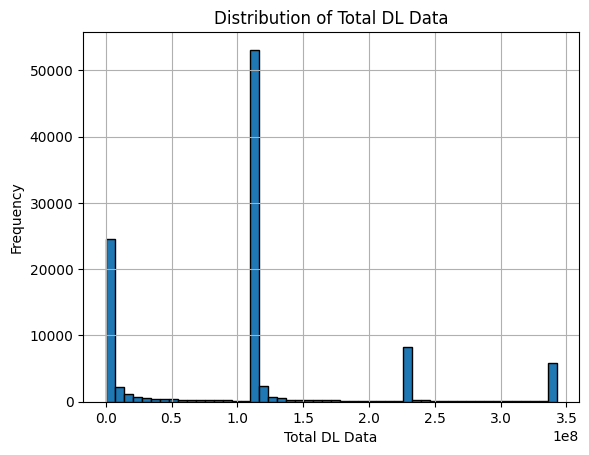

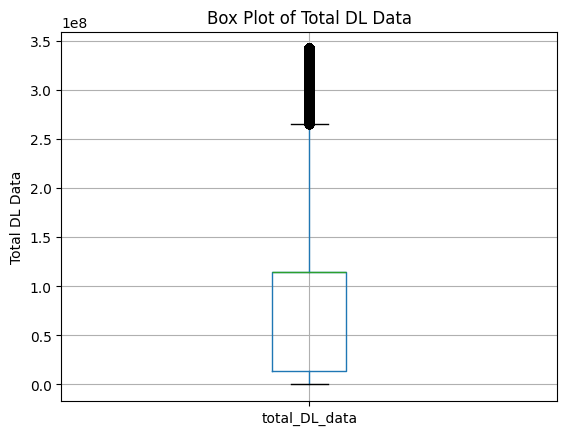

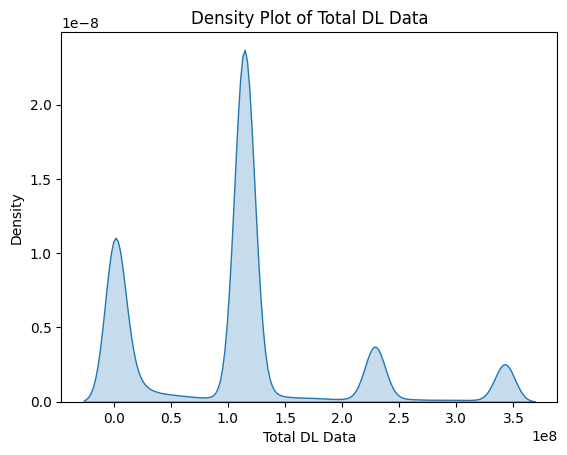

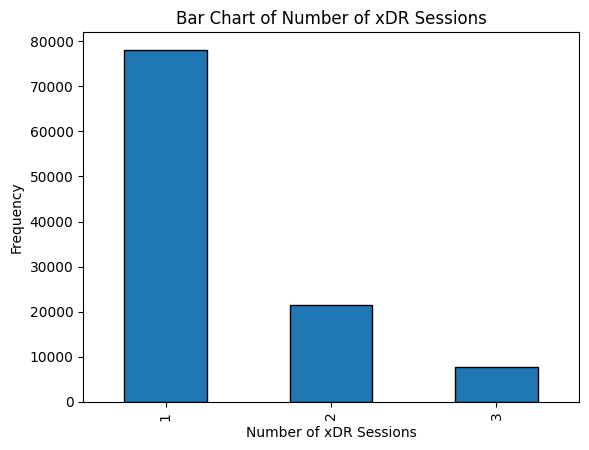

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Total DL Data
data1['total_DL_data'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Total DL Data')
plt.xlabel('Total DL Data')
plt.ylabel('Frequency')
plt.show()

# Box Plot for Total DL Data
data1.boxplot(column='total_DL_data')
plt.title('Box Plot of Total DL Data')
plt.ylabel('Total DL Data')
plt.show()

# Density Plot for Total DL Data
sns.kdeplot(data1['total_DL_data'], fill=True)
plt.title('Density Plot of Total DL Data')
plt.xlabel('Total DL Data')
plt.ylabel('Density')
plt.show()

# Bar Chart for Number of xDR Sessions
data1['number_of_xDR_sessions'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Bar Chart of Number of xDR Sessions')
plt.xlabel('Number of xDR Sessions')
plt.ylabel('Frequency')
plt.show()

##### Interpretation of Findings
###### Histograms
Total DL Data: The histogram shows the distribution of download data among users. A right-skewed distribution indicates that most users have lower download data usage, with a few users having very high usage.
Total UL Data: Similar to download data, the upload data histogram reveals a right-skewed distribution, suggesting that most users upload less data, with a few heavy uploaders.
###### Box Plots
Total DL Data: The box plot highlights the presence of outliers in download data usage. The interquartile range (IQR) shows the spread of the middle 50% of the data, while the whiskers extend to the minimum and maximum values within 1.5 times the IQR.
Total UL Data: The box plot for upload data also reveals outliers and provides a clear view of the data spread and central tendency.
###### Density Plots
Total DL Data: The density plot provides a smooth curve representing the distribution of download data. Peaks in the plot indicate the most common data usage levels among users.
Total UL Data: The density plot for upload data shows similar patterns, with peaks indicating common upload data usage levels.
###### Bar Charts
Number of xDR Sessions: The bar chart shows the frequency of different numbers of xDR sessions. It helps identify the most common session counts among users.
Decile: The bar chart for deciles shows the distribution of users across different decile classes based on their total session duration.

##### Bivariate Analysis

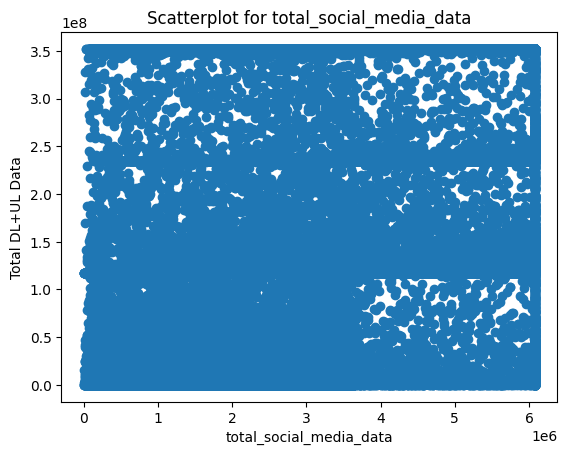

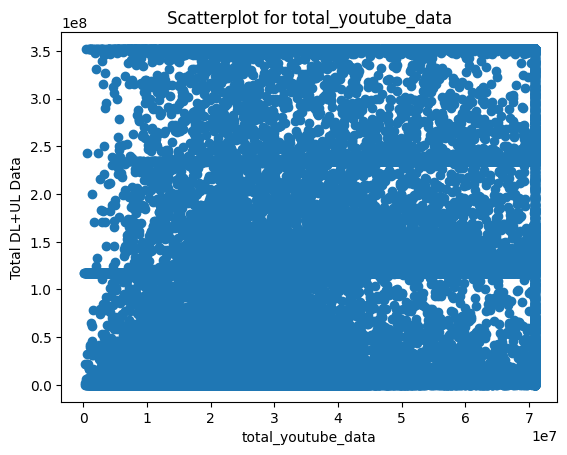

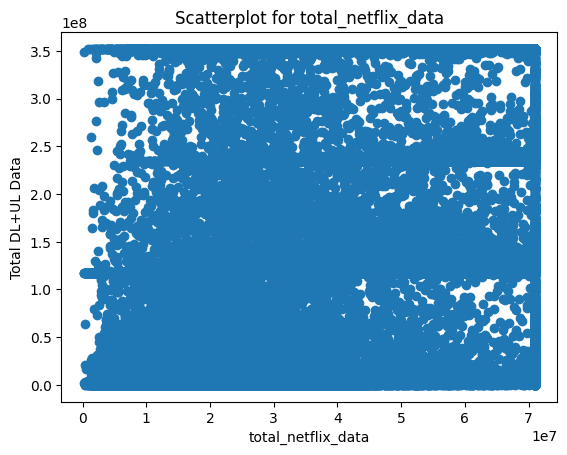

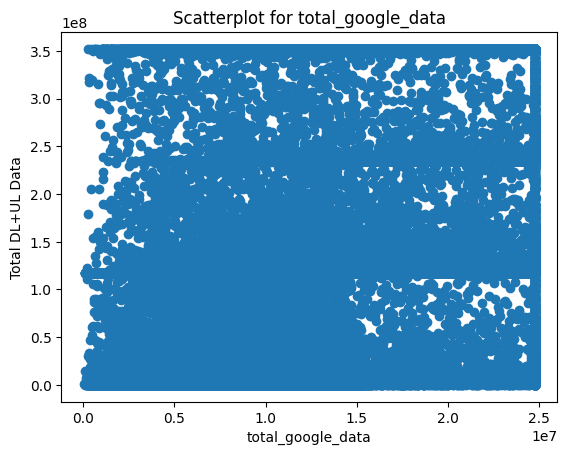

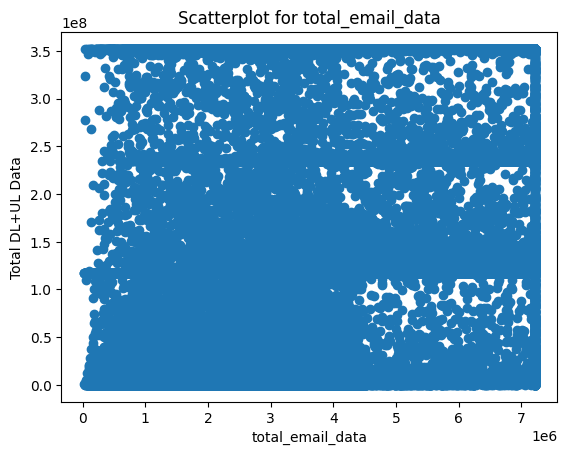

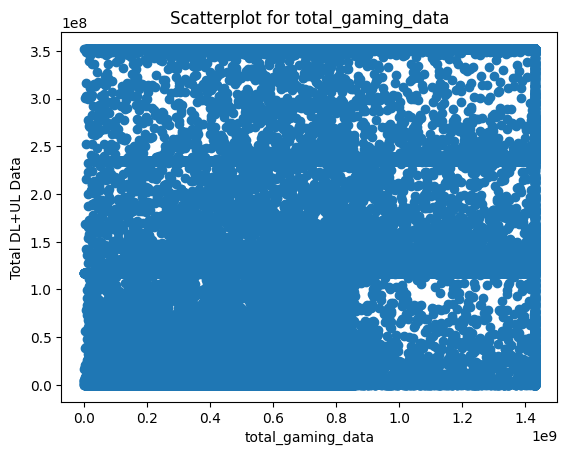

In [19]:
# List of applications
applications = ['total_social_media_data', 'total_youtube_data', 'total_netflix_data', 'total_google_data', 'total_email_data', 'total_gaming_data']

# Plot scatterplots
for app in applications:
    plt.scatter(data1[app], data1['total_DL_data'] + data1['total_UL_data'])
    plt.title(f'Scatterplot for {app}')
    plt.xlabel(app)
    plt.ylabel('Total DL+UL Data')
    plt.show()

#### Correlation Analysis

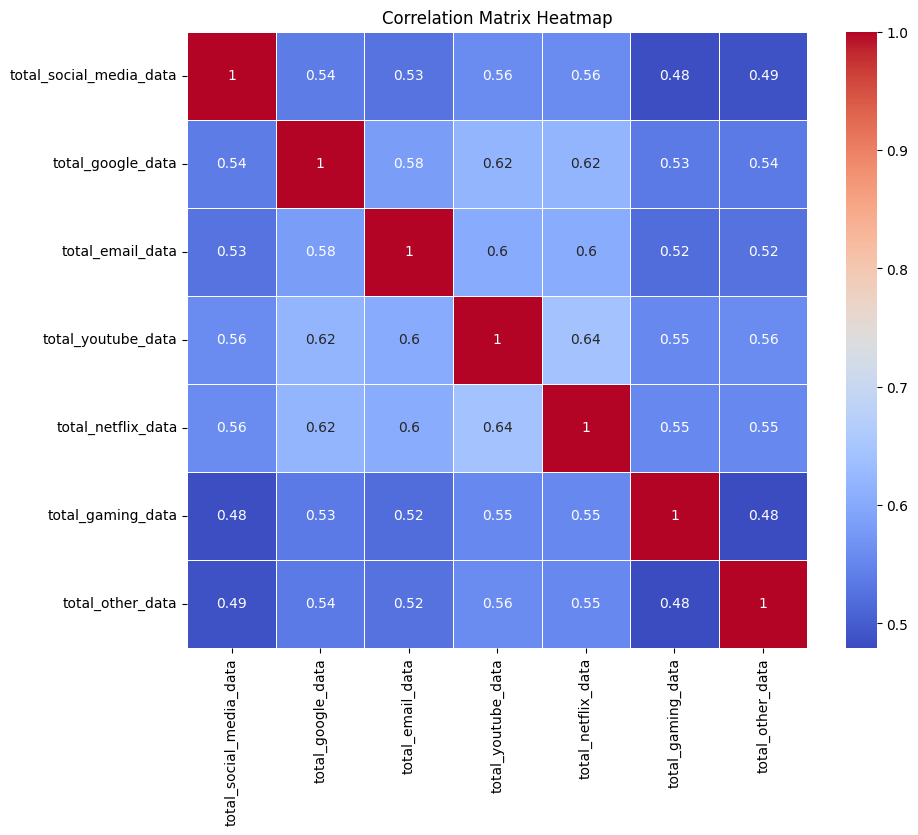

In [20]:
# Select relevant columns
columns_of_interest = [
    'total_social_media_data', 'total_google_data', 'total_email_data',
    'total_youtube_data', 'total_netflix_data', 'total_gaming_data', 'total_other_data'
]

# Compute the correlation matrix
correlation_matrix = data1[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

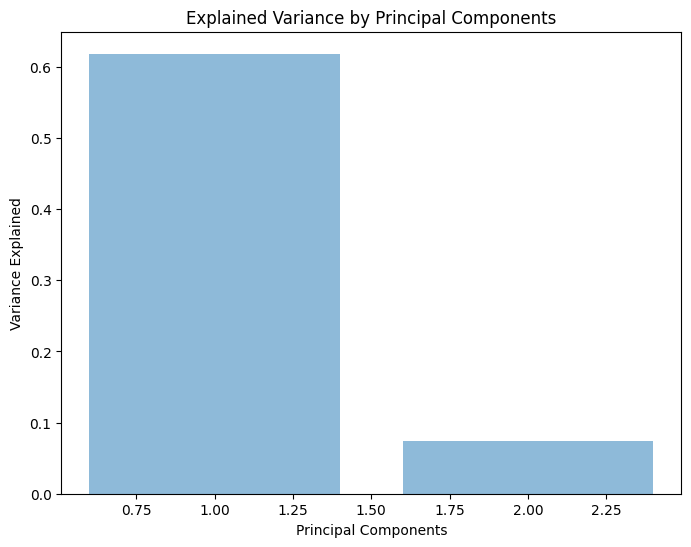

        PC1       PC2
0  6.279812  0.009276
1 -0.684183 -0.799719
2 -1.732757 -0.461770
3 -1.095095 -1.234132
4 -0.220586 -0.125391


In [21]:
# Select relevant columns
columns_of_interest = [
    'total_social_media_data', 'total_google_data', 'total_email_data',
    'total_youtube_data', 'total_netflix_data', 'total_gaming_data', 'total_other_data'
]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1[columns_of_interest])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variance Explained')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.show()

# Display the principal components
print(pca_df.head())


#### Interpretation of PCA Results
##### Graph Interpretation
###### Explained Variance:
PC1: The first principal component explains over 50% of the variance in the data. This indicates that PC1 captures the most significant patterns and variations.
PC2: The second principal component explains just above 10% of the variance. While it contributes to understanding the data, its impact is much less compared to PC1.
##### Principal Component Scores
###### PC1 Dominance:
The first observation has a significantly higher score for PC1 (6.279812), suggesting it has a strong influence on the variance captured by PC1.
Other observations have negative scores for PC1, indicating they contribute differently to the variance.
###### PC2 Variation:
The scores for PC2 range from -1.234132 to 0.009276, showing more variation among the observations. This indicates that PC2 captures different aspects of the data not explained by PC1.
###### Negative Scores:
Observations 1, 2, 3, and 4 have negative scores for both PC1 and PC2, suggesting they represent a different pattern or cluster in the data.
###### Low Influence:
Observation 4 has the lowest scores for both PC1 (-0.220586) and PC2 (-0.125391), indicating it has minimal influence on the variance captured by these components.
###### Summary
PC1 is the most significant component, capturing over half of the variance in the data.
PC2 adds additional insight but explains a smaller portion of the variance.
The principal component scores highlight the influence of individual observations, with some contributing more significantly to the variance captured by PC1 and PC2.
Negative scores for certain observations suggest different patterns or clusters within the data.